 # Project: indian priemer league
 rules of the game :
the fielding team will put all 11 players in the field while the batting team will put 2 batsmen in the field
the batsmen work in pair there role is to score runs and defend against wickets(3 wooden rodes like sturcture that they try try 
to protect)they try to hit the ball away from the wickets if the batsman hits the ball and both men run safely to the oppisite crease this scores 1 run ,if the ball goes out of the boundary without bouning its a awhole 6 runs if it bounces its a 4 runs 
the bowling team which score wickets win if they hit the wicket or if the batsman hitted their ball but one of the feilders catches it before the batsmen changes postion they play until the inning is over( the innig is 6 overs with 50 ball in an over(6 balls for every player) or if each player throws 1 ball and they took 10 wickets its the end of inning)) after the ining ends they exchange turns and the winning team is the team surpases the score of the other competing team
## Table of Contents
<ul>
<li><a href="#intro">best teams in india (advising on choosing teams for advertisments)</a></li>
<li><a href="#wrangling">top players in india(advising on choosing players for advertisments)</a></li>
<li><a href="#eda">factors affecting winning or lossing</a></li>

</ul>


In [165]:
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
match_df=pd.read_csv(r'C:\program alaa\excel 001\matches.csv')
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [167]:
match_df.duplicated().sum()

0

umpires are the judges they donot belong to any team so they dont affect the match results 

so we can custmize our table as follows

In [168]:
match_df.drop(['city','toss_decision','result','dl_applied','venue','umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [169]:
match_df.head()

,id,season,date,team1,team2,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7,SPD Smith
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10,CA Lynn
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,6,GJ Maxwell
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0,KM Jadhav


In [170]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   winner           752 non-null    object
 6   win_by_runs      756 non-null    int64 
 7   win_by_wickets   756 non-null    int64 
 8   player_of_match  752 non-null    object
dtypes: int64(4), object(5)
memory usage: 53.3+ KB


we have 4 rows having nulls we can cancel those matches

In [171]:
match_df.dropna(subset=['winner','player_of_match'],inplace=True)


In [172]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               752 non-null    int64 
 1   season           752 non-null    int64 
 2   date             752 non-null    object
 3   team1            752 non-null    object
 4   team2            752 non-null    object
 5   winner           752 non-null    object
 6   win_by_runs      752 non-null    int64 
 7   win_by_wickets   752 non-null    int64 
 8   player_of_match  752 non-null    object
dtypes: int64(4), object(5)
memory usage: 58.8+ KB


<a id='intro'></a>
to know what teams to use for advertisments we need to know what are top 5 wining teams?

In [173]:
df_no_counts=match_df.groupby(['winner'])['winner'].count()

In [174]:
df_no_counts

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: winner, dtype: int64

its obivous that mumbai indains ,chennai super kings ,kolkata knights riders are the best teams respectively 

Text(0.5, 1.0, 'which team is the best')

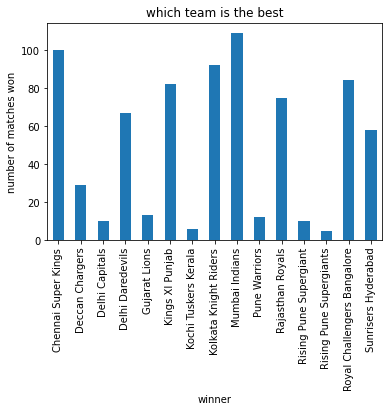

In [175]:
df_no_counts.plot(kind='bar')

plt.ylabel('number of matches won')
plt.title('which team is the best')

In [176]:
deliveries_df=pd.read_csv(r'C:\program alaa\excel 001\deliveries.csv')

In [177]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [178]:
deliveries_df['player_dismissed'].fillna(0,inplace=True)
deliveries_df['dismissal_kind'].fillna(0,inplace=True)
deliveries_df['fielder'].fillna(0,inplace=True)

In [179]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [180]:
deliveries_df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,0,0,0
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,0,0,0
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,0,0,0
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,0,0,0


In [181]:
deliveries_df['batsman'].value_counts

<bound method IndexOpsMixin.value_counts of 0         DA Warner
1         DA Warner
2         DA Warner
3         DA Warner
4         DA Warner
            ...    
179073    RA Jadeja
179074    SR Watson
179075    SR Watson
179076    SN Thakur
179077    SN Thakur
Name: batsman, Length: 179078, dtype: object>

In [182]:
list(deliveries_df)

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

<a id='wrangling'></a>
best players in india

In [183]:
df_batsman_counts=deliveries_df.groupby(['batsman'])['is_super_over'].count()

In [184]:
df_batsman_counts_runs=deliveries_df.groupby(['batsman'])['batsman_runs'].count()

In [185]:
df_batsman_counts

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Dananjaya          5
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2207
Z Khan             141
Name: is_super_over, Length: 516, dtype: int64

In [186]:
df_batsman_counts_runs

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Dananjaya          5
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2207
Z Khan             141
Name: batsman_runs, Length: 516, dtype: int64

In [187]:
df_batsman_counts.sort_values(ascending=False,inplace=True)

the top 20 basmen

In [188]:
batsmen_top=df_batsman_counts[0:20]
batsmen_top

batsman
V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
RV Uthappa        3492
DA Warner         3398
MS Dhoni          3318
AM Rahane         3215
CH Gayle          3131
AB de Villiers    2977
KD Karthik        2890
AT Rayudu         2681
SR Watson         2639
PA Patel          2444
MK Pandey         2425
YK Pathan         2334
JH Kallis         2291
BB McCullum       2272
Yuvraj Singh      2207
Name: is_super_over, dtype: int64

Text(0.5, 1.0, 'which batsman is the best')

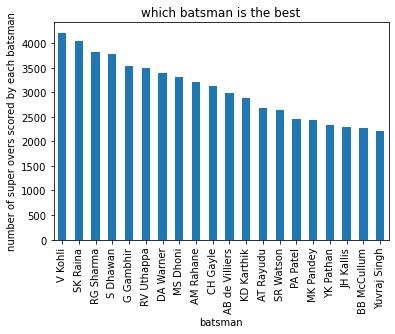

In [189]:
batsmen_top.plot(kind='bar')

plt.ylabel('number of super overs scored by each batsman')
plt.title('which batsman is the best')

finding the player who have been the player of the match in the most of the  matches of a season if there is 

In [190]:
match_df.head()

,id,season,date,team1,team2,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,7,SPD Smith
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,10,CA Lynn
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,6,GJ Maxwell
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,15,0,KM Jadhav


In [191]:
season_best=match_df.groupby(['season'])['player_of_match'].value_counts().unstack('player_of_match')

In [192]:
season_best

player_of_match,A Chandila,A Joseph,A Kumble,A Mishra,A Nehra,A Singh,A Symonds,A Zampa,AA Jhunjhunwala,AB Dinda,...,V Kohli,V Sehwag,VR Aaron,WP Saha,WPUJC Vaas,Washington Sundar,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
season,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2009,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
2010,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
2011,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN
2012,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2013,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN
2015,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2016,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,2.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [193]:
season_best.fillna(0,inplace=True)

In [194]:
season_best

player_of_match,A Chandila,A Joseph,A Kumble,A Mishra,A Nehra,A Singh,A Symonds,A Zampa,AA Jhunjhunwala,AB Dinda,...,V Kohli,V Sehwag,VR Aaron,WP Saha,WPUJC Vaas,Washington Sundar,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan
season,,,,,,,,,,,,,,,,,,,,,
2008,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2009,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2015,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [195]:
season_best.groupby(['A Chandila'])['A Chandila'].sum()

A Chandila
0.0    0.0
1.0    1.0
Name: A Chandila, dtype: float64

In [196]:
season_best.groupby(['A Symonds'])['A Symonds'].sum()

A Symonds
0.0    0.0
3.0    3.0
Name: A Symonds, dtype: float64

In [197]:
best_of_the_best=[]
for col in season_best.columns:
    scores=season_best.groupby([col])[col].sum()
    best_of_the_best.append(scores.max())
    
    print('number of times %a  achieves player of the match in a single season:'%col,scores.max())
    

number of times 'A Chandila'  achieves player of the match in a single season: 1.0
number of times 'A Joseph'  achieves player of the match in a single season: 1.0
number of times 'A Kumble'  achieves player of the match in a single season: 3.0
number of times 'A Mishra'  achieves player of the match in a single season: 5.0
number of times 'A Nehra'  achieves player of the match in a single season: 3.0
number of times 'A Singh'  achieves player of the match in a single season: 1.0
number of times 'A Symonds'  achieves player of the match in a single season: 3.0
number of times 'A Zampa'  achieves player of the match in a single season: 1.0
number of times 'AA Jhunjhunwala'  achieves player of the match in a single season: 1.0
number of times 'AB Dinda'  achieves player of the match in a single season: 2.0
number of times 'AB de Villiers'  achieves player of the match in a single season: 8.0
number of times 'AC Gilchrist'  achieves player of the match in a single season: 4.0
number of t

In [198]:
best_of_the_best

[1.0,
 1.0,
 3.0,
 5.0,
 3.0,
 1.0,
 3.0,
 1.0,
 1.0,
 2.0,
 8.0,
 4.0,
 1.0,
 1.0,
 1.0,
 6.0,
 3.0,
 2.0,
 6.0,
 1.0,
 4.0,
 2.0,
 2.0,
 5.0,
 2.0,
 4.0,
 2.0,
 1.0,
 1.0,
 3.0,
 4.0,
 1.0,
 4.0,
 2.0,
 2.0,
 6.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 6.0,
 2.0,
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 6.0,
 3.0,
 1.0,
 2.0,
 6.0,
 2.0,
 1.0,
 2.0,
 1.0,
 4.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 3.0,
 1.0,
 1.0,
 4.0,
 3.0,
 1.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 5.0,
 3.0,
 4.0,
 4.0,
 1.0,
 3.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 4.0,
 3.0,
 2.0,
 1.0,
 2.0,
 1.0,
 5.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 7.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 4.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 2.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0

In [199]:
best_ever=sorted(best_of_the_best,reverse=True)


those are the best players in the indian's league each one of them has been the player of the match for at least 6 matches in the same season

In [200]:
best_ever=[]
for col in season_best.columns:
    scores=season_best.groupby([col])[col].sum()
    if scores.max() >= 6:
        best_ever.append(col)
best_ever    

['AB de Villiers',
 'AD Russell',
 'AM Rahane',
 'CH Gayle',
 'DA Warner',
 'DR Smith',
 'G Gambhir',
 'MS Dhoni',
 'RG Sharma',
 'SK Raina',
 'SP Narine',
 'UT Yadav',
 'YK Pathan']

the best player ever in india is one the  who won the prize of being  the player of the match for the maxiumum number of times

In [201]:
best_player=match_df.groupby(['player_of_match'])['player_of_match'].count()

In [202]:
best_player.sort_values(ascending=False,inplace=True)

In [203]:
best_player

player_of_match
CH Gayle           21
AB de Villiers     20
MS Dhoni           17
DA Warner          17
RG Sharma          17
                   ..
KMDN Kulasekara     1
KK Cooper           1
K Rabada            1
K Paul              1
Z Khan              1
Name: player_of_match, Length: 226, dtype: int64

the best player is CH Gayle who has been the player of the match for 21 entrie matches

<a id='eda'></a>
what are the factors affecting winning or lossing the match?

In [204]:
match_df=pd.read_csv(r'C:\program alaa\excel 001\matches.csv')
deliveries_df=pd.read_csv(r'C:\program alaa\excel 001\deliveries.csv')

In [205]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [206]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [207]:
match_df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

the matches ends in tie means no one wins the teams scored equally

In [209]:
relative_equal_teams=match_df[match_df['result']=='tie']

the following teams scored equally and no one won there are 9 matches only ended this way

In [213]:
relative_equal_teams.groupby(['team1','team2'])['team1','team2'].count()

<ipython-input-213-f2fa542638e5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  relative_equal_teams.groupby(['team1','team2'])['team1','team2'].count()


team1  team2
team1                       team2                                    
Delhi Daredevils            Royal Challengers Bangalore      1      1
Gujarat Lions               Mumbai Indians                   1      1
Kings XI Punjab             Chennai Super Kings              1      1
Kolkata Knight Riders       Delhi Capitals                   1      1
Mumbai Indians              Sunrisers Hyderabad              1      1
Rajasthan Royals            Kings XI Punjab                  1      1
                            Kolkata Knight Riders            2      2
Royal Challengers Bangalore Sunrisers Hyderabad              1      1

has winning the toss an impact on winning the match

In [217]:
luck_role=match_df[match_df['toss_winner']==match_df['winner']]
luck_role

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


there are 393 matches were the toss winner won the match lets see if a certain team was good enough at batting that when starts by batting the other team cant beat its score

In [223]:
teams=luck_role['winner'].value_counts()

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    41
Delhi Daredevils               35
Kings XI Punjab                35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

Text(0.5, 1.0, '    if you were lucky to win the toss can it help winning the match? ')

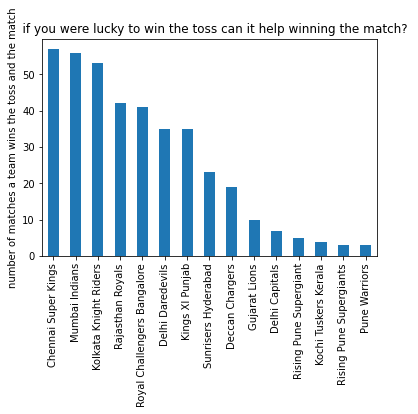

In [226]:
teams.plot(kind='bar')
plt.ylabel('number of matches a team wins the toss and the match')
plt.title('    if you were lucky to win the toss can it help winning the match? ')

winning by runs or winning by wickets which is more often to occur?

In [231]:
win_runs=match_df[match_df['win_by_runs']!=0]
win_runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


there are 337 matches were the winning teams won by runs

In [232]:
win_wickets=match_df[match_df['win_by_wickets']!=0]
win_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


there 406 matches were the winning team won by wickets

are certain venues better for winning by runs?

In [234]:
venue_win_runs=win_runs.groupby(['venue'])['win_by_runs'].count()
venue_win_runs

venue
Barabati Stadium                                         4
Brabourne Stadium                                        6
Buffalo Park                                             2
De Beers Diamond Oval                                    1
Dr DY Patil Sports Academy                               7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Dubai International Cricket Stadium                      3
Eden Gardens                                            32
Feroz Shah Kotla                                        33
Feroz Shah Kotla Ground                                  2
Himachal Pradesh Cricket Association Stadium             5
Holkar Cricket Stadium                                   1
IS Bindra Stadium                                        2
JSCA International Stadium Complex                       2
Kingsmead                                                9
M Chinnaswamy Stadium                                   30
M. A. Chidambaram Stadium                         

In [235]:
venue_win_runs.sort_values(ascending=False,inplace=True)

In [236]:
venue_win_runs

venue
Wankhede Stadium                                        35
Feroz Shah Kotla                                        33
Eden Gardens                                            32
MA Chidambaram Stadium, Chepauk                         30
M Chinnaswamy Stadium                                   30
Rajiv Gandhi International Stadium, Uppal               23
Sawai Mansingh Stadium                                  15
Punjab Cricket Association Stadium, Mohali              15
Subrata Roy Sahara Stadium                              11
Kingsmead                                                9
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Maharashtra Cricket Association Stadium                  7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Dr DY Patil Sports Academy                               7
Sardar Patel Stadium, Motera                             6
Brabourne Stadium                                        6
Himachal Pradesh Cricket Association Stadium      

top 10 venues to win by runs

In [241]:
top_10_runs=venue_win_runs[0:10:]
top_10_runs

venue
Wankhede Stadium                              35
Feroz Shah Kotla                              33
Eden Gardens                                  32
MA Chidambaram Stadium, Chepauk               30
M Chinnaswamy Stadium                         30
Rajiv Gandhi International Stadium, Uppal     23
Sawai Mansingh Stadium                        15
Punjab Cricket Association Stadium, Mohali    15
Subrata Roy Sahara Stadium                    11
Kingsmead                                      9
Name: win_by_runs, dtype: int64

Text(0.5, 1.0, '    venues which are compitable in desgin to winning by runs ')

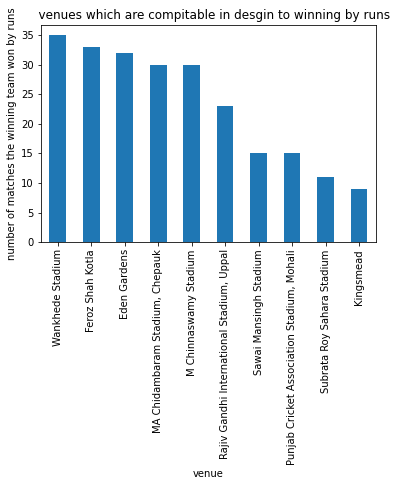

In [260]:
top_10_runs.plot(kind='bar')
plt.ylabel('number of matches the winning team won by runs')
plt.title('    venues which are compitable in desgin to winning by runs ')

are certain venues better for winning by runs?

In [245]:
venue_wickets=win_wickets.groupby(['venue'])['win_by_wickets'].count()
venue_wickets

venue
ACA-VDCA Stadium                                         2
Barabati Stadium                                         3
Brabourne Stadium                                        5
Buffalo Park                                             1
De Beers Diamond Oval                                    2
Dr DY Patil Sports Academy                              10
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      4
Dubai International Cricket Stadium                      4
Eden Gardens                                            45
Feroz Shah Kotla                                        33
Feroz Shah Kotla Ground                                  4
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             4
Holkar Cricket Stadium                                   8
IS Bindra Stadium                                        5
JSCA International Stadium Complex                       5
Kingsmead                                         

In [255]:
venue_wickets.sort_values(ascending=False,inplace=True)

In [256]:
venue_wickets

venue
Eden Gardens                                            45
M Chinnaswamy Stadium                                   40
Wankhede Stadium                                        37
Feroz Shah Kotla                                        33
Sawai Mansingh Stadium                                  32
Rajiv Gandhi International Stadium, Uppal               32
Punjab Cricket Association Stadium, Mohali              20
MA Chidambaram Stadium, Chepauk                         18
Maharashtra Cricket Association Stadium                 14
Dr DY Patil Sports Academy                              10
Holkar Cricket Stadium                                   8
SuperSport Park                                          8
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Saurashtra Cricket Association Stadium                   6
Kingsmead                                                6
Subrata Roy Sahara Stadium                               6
JSCA International Stadium Complex                

In [257]:
top_10venues_wickets=venue_wickets[0:10:]

In [258]:
top_10venues_wickets

venue
Eden Gardens                                  45
M Chinnaswamy Stadium                         40
Wankhede Stadium                              37
Feroz Shah Kotla                              33
Sawai Mansingh Stadium                        32
Rajiv Gandhi International Stadium, Uppal     32
Punjab Cricket Association Stadium, Mohali    20
MA Chidambaram Stadium, Chepauk               18
Maharashtra Cricket Association Stadium       14
Dr DY Patil Sports Academy                    10
Name: win_by_wickets, dtype: int64

Text(0.5, 1.0, '    venues which are compitable in desgin to winning by wickets ')

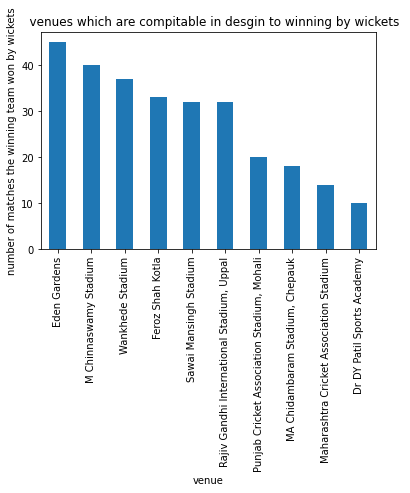

In [261]:
top_10venues_wickets.plot(kind='bar')
plt.ylabel('number of matches the winning team won by wickets')
plt.title('    venues which are compitable in desgin to winning by wickets ')